In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
def normalize(X):
    X = X.astype('float32')
    X /= 255
    return X

def one_hot_encode(y):
    return to_categorical(y)

In [5]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [6]:
y_train, y_test = one_hot_encode(y_train), one_hot_encode(y_test)

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

2023-09-27 16:07:19.859877: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-09-27 16:07:19.859899: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-27 16:07:19.859904: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-27 16:07:19.859938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-27 16:07:19.859954: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1)

Epoch 1/10


2023-09-27 16:07:20.480360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 10s 20ms/step - loss: 0.1815 - accuracy: 0.9449
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0773 - accuracy: 0.9780
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0927 - accuracy: 0.9793
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2753 - accuracy: 0.9746
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 1.2850 - accuracy: 0.9700
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 6.6530 - accuracy: 0.9643
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 19.0900 - accuracy: 0.9660
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 43.2155 - accuracy: 0.9622
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 97.0817 - accuracy: 0.9601
Epoch 10/10
469/469 [==============================] - 9s 20ms/step - loss: 183.2878 - accuracy: 0

In [11]:
model.evaluate(X_test, y_test)

 12/313 [>.............................] - ETA: 2s - loss: 348.8987 - accuracy: 0.9349

2023-09-27 16:08:53.068883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 342.7185 - accuracy: 0.9430


[342.7185363769531, 0.9430000185966492]

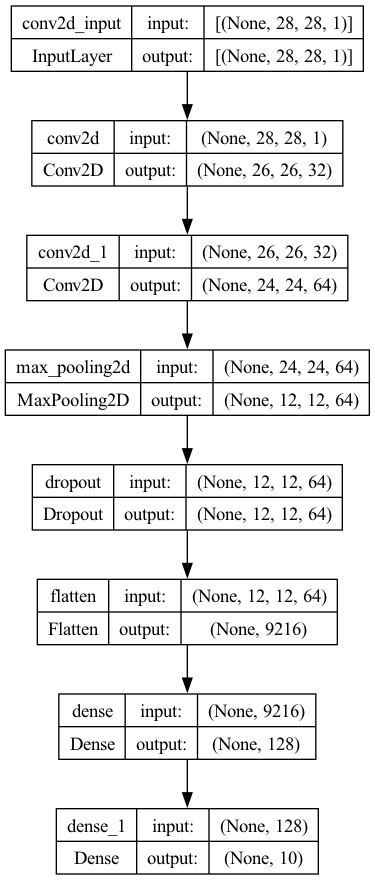

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

1/1 [==============================] - 0s 18ms/step


2023-09-27 16:08:57.959685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 12ms/step


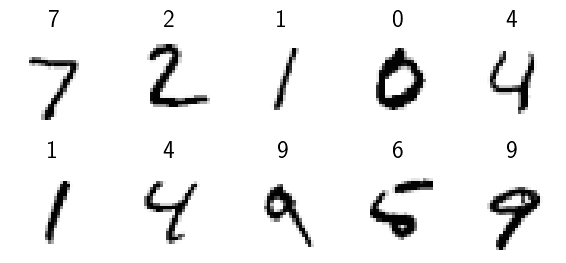

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(6, 3))
axes = axes.flatten()
for img, ax in zip(X_test[:10], axes):
    ax.imshow(img.reshape(28, 28), cmap='Greys')
    pred = np.argmax(model.predict(img.reshape(-1, 28, 28, 1)))
    ax.set_title(pred)
    ax.axis('off')
plt.tight_layout()
plt.show()